# import relevant libaries 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# data generation

In [31]:
#generate fake data 
observations = 1000 #tensorflow is tensor based, likes tensors and does not like csv. tensors can be represented like multi dimensional arrays 

xs = np.random.uniform(low=-10, high=10, size=(observations , 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))


generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets) #saved preprocessed data into NPZ (tensorflow preffered file type)

# solving with TensorFlow

In [32]:
training_data = np.load('TF_intro.npz') #could have skipped this step but good to get used to load data from npz

In [33]:
#with tensorflow must actually build model 

input_size = 2
output_size = 1          #ouput = np.dot(input,weights) + bias

#Sequential indicates laying down model 

model = tf.keras.Sequential([          #tf2 is based on keras so module needed
                            tf.keras.layers.Dense(output_size)     #takes inputs, provides single linear transformation and provides outputs 
                            ])   #dense method takes inputs provided to the model and calculates the dot product of the inputs & the weights and adds the biases 

#scaling by the number of observagtions is equivilent to finding the average 

model.compile(optimizer="sgd", loss="mean_squared_error")      #select optimization algorithim sgd(stantastic gradient descient)

#mean squared error is the L2 norm loss scaled by the number of observations 

#indicate which data to fit & with output confirm loss is decreasing 

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2) #epoch is iteration over full datset, verbose = 0 set to 0 or no ouput about training 

Epoch 1/100
32/32 - 0s - loss: 34.9382
Epoch 2/100
32/32 - 0s - loss: 4.5935
Epoch 3/100
32/32 - 0s - loss: 1.5104
Epoch 4/100
32/32 - 0s - loss: 0.6802
Epoch 5/100
32/32 - 0s - loss: 0.4401
Epoch 6/100
32/32 - 0s - loss: 0.3787
Epoch 7/100
32/32 - 0s - loss: 0.3628
Epoch 8/100
32/32 - 0s - loss: 0.3575
Epoch 9/100
32/32 - 0s - loss: 0.3549
Epoch 10/100
32/32 - 0s - loss: 0.3622
Epoch 11/100
32/32 - 0s - loss: 0.3576
Epoch 12/100
32/32 - 0s - loss: 0.3548
Epoch 13/100
32/32 - 0s - loss: 0.3557
Epoch 14/100
32/32 - 0s - loss: 0.3620
Epoch 15/100
32/32 - 0s - loss: 0.3532
Epoch 16/100
32/32 - 0s - loss: 0.3496
Epoch 17/100
32/32 - 0s - loss: 0.3552
Epoch 18/100
32/32 - 0s - loss: 0.3528
Epoch 19/100
32/32 - 0s - loss: 0.3553
Epoch 20/100
32/32 - 0s - loss: 0.3554
Epoch 21/100
32/32 - 0s - loss: 0.3491
Epoch 22/100
32/32 - 0s - loss: 0.3530
Epoch 23/100
32/32 - 0s - loss: 0.3545
Epoch 24/100
32/32 - 0s - loss: 0.3556
Epoch 25/100
32/32 - 0s - loss: 0.3554
Epoch 26/100
32/32 - 0s - loss: 0

# extract the weights and biases

In [35]:
model.layers[0].get_weights() #position 0 for layer, method get weights show one array for weights and one for biases

[array([[ 1.9789602],
        [-3.0179768]], dtype=float32),
 array([5.004401], dtype=float32)]

# extract the outputs (make predictions)

In [38]:
model.predict_on_batch(training_data['inputs']) #feed training inputs, result will be array of corresponding output for each inputs.values compared to targets to evalute loss function.

array([[ 2.18962173e+01],
       [ 2.11585960e+01],
       [-1.00834999e+01],
       [ 3.32671204e+01],
       [-9.12909794e+00],
       [-2.66359406e+01],
       [ 2.45654068e+01],
       [-1.16761732e+01],
       [ 1.26732426e+01],
       [ 3.67866230e+00],
       [ 2.18208199e+01],
       [ 1.76639748e+01],
       [ 3.49946899e+01],
       [ 2.48511925e+01],
       [-6.90557384e+00],
       [ 1.99434700e+01],
       [ 6.95399141e+00],
       [ 2.32210045e+01],
       [ 2.67709045e+01],
       [ 2.13365860e+01],
       [-2.04025192e+01],
       [ 2.43614674e+00],
       [ 2.20190353e+01],
       [-1.46282387e+00],
       [ 2.11306534e+01],
       [ 1.69165878e+01],
       [-3.21878815e+01],
       [ 2.31445503e+01],
       [ 1.83458614e+01],
       [-4.02549839e+00],
       [ 1.35157080e+01],
       [-1.32569170e+01],
       [-3.01533051e+01],
       [ 4.15288467e+01],
       [-1.11148767e+01],
       [ 1.81639366e+01],
       [-1.94765968e+01],
       [ 3.69573689e+00],
       [ 2.3

In [39]:
#since outputs compared to targets at each epoch, may compare manually 
training_data['targets'].round(1) #ouptuts and targets close to each but not the same 

array([[ 22.7],
       [ 20.4],
       [ -9.9],
       [ 33.9],
       [ -8. ],
       [-26.5],
       [ 24.7],
       [-11.5],
       [ 13.2],
       [  3.7],
       [ 22.3],
       [ 18.3],
       [ 35.9],
       [ 24.6],
       [ -7.5],
       [ 19.1],
       [  6.9],
       [ 22.3],
       [ 27. ],
       [ 22.4],
       [-19.8],
       [  1.3],
       [ 21.3],
       [ -1.8],
       [ 21.2],
       [ 16.7],
       [-31.3],
       [ 22. ],
       [ 18. ],
       [ -3.3],
       [ 14.3],
       [-14.1],
       [-29.7],
       [ 41.8],
       [-11. ],
       [ 18.9],
       [-19. ],
       [  2.8],
       [ 23.6],
       [  4.5],
       [-11.4],
       [ 20.2],
       [ 26.1],
       [ 44.6],
       [ 19.4],
       [-34.2],
       [  2.3],
       [  8. ],
       [-16.3],
       [ -7.1],
       [-23.6],
       [  8.2],
       [-29.7],
       [  5.7],
       [ 20.1],
       [ -5. ],
       [ 31. ],
       [-22.9],
       [  0.4],
       [  7. ],
       [  7.8],
       [ -8.7],
       [

# plotting the data

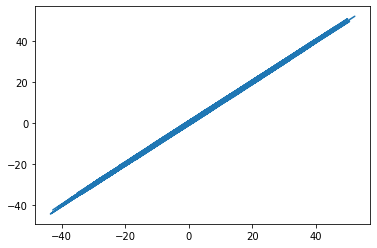

In [42]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))